In [1]:
# 4. Data Preprocessing:

# Generate the summary on missing values
# Document any inconsistencies and potential outliers
# Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers.

In [2]:
#import key dependencies
import pandas as pd
import numpy as np
import sqlite3

In [3]:
# Data integration - read data for pre-processing
sqlite_db = r"D:\git_repo_IO_mini_project1\IOD_mini_project1\preprocess_db.sqlite"
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()
tableName_regions = "regions"
tableName_provinces = "provinces"
tableName_merged_report = "merged_report"
tableName_report_total = "reports_total"

In [4]:
df_region = pd.read_sql_query("SELECT * FROM "+tableName_regions,conn)
df_region.set_index("index",inplace=True)
df_provinces = pd.read_sql_query("SELECT * FROM "+tableName_provinces,conn)
df_provinces.set_index("index",inplace=True)
df_merged_report = pd.read_sql_query("SELECT * FROM "+tableName_merged_report,conn)
df_merged_report.set_index("index",inplace=True)
df_reports_total = pd.read_sql_query("SELECT * FROM "+tableName_report_total,conn)
df_reports_total.set_index("index",inplace=True)

In [5]:
df_merged_report.head()

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long
index,,,,,,,,,,,,,,,,
0,2023-03-09,209451,7896,0,0,0,0,2023-03-10 04:21:03,201555,0,0.0377,AFG,Afghanistan,,33.9391,67.7100
1,2023-03-09,334457,3598,0,14,0,0,2023-03-10 04:21:03,330859,14,0.0108,ALB,Albania,,41.1533,20.1683
2,2023-03-09,271496,6881,0,2,0,0,2023-03-10 04:21:03,264615,2,0.0253,DZA,Algeria,,28.0339,1.6596
3,2023-03-09,47890,165,0,0,0,0,2023-03-10 04:21:03,47725,0,0.0034,AND,Andorra,,42.5063,1.5218
4,2023-03-09,105288,1933,0,0,0,0,2023-03-10 04:21:03,103355,0,0.0184,AGO,Angola,,-11.2027,17.8739


In [65]:
dict(df_merged_report["iso"].value_counts())
df_merged_report[df_merged_report["iso"]=="TWN"]

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long
index,,,,,,,,,,,,,,,,
663,2023-03-09,9970937,17672,0,0,0,0,2023-03-10 04:21:03,9953265,0,0.0018,TWN,Taiwan*,,23.7000,121.0000


In [6]:
#suppose we want to explore of ISO == 'CHN'
df_CHN = df_merged_report[df_merged_report["iso"]=="CHN"]
#check for null values
print(df_CHN.isna().value_counts())
df_CHN[df_CHN["lat"].isna()]

date   confirmed  deaths  recovered  confirmed_diff  deaths_diff  recovered_diff  last_update  active  active_diff  fatality_rate  iso    name   province  lat    long 
False  False      False   False      False           False        False           False        False   False        False          False  False  False     False  False    33
                                                                                                                                                           True   True      1
Name: count, dtype: int64


,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long
index,,,,,,,,,,,,,,,,
141,2023-03-09,1521816,82195,0,0,0,0,2023-03-10 04:21:03,1439621,0,0.054,CHN,China,Unknown,None,None


In [7]:
#drop row because its an unknown province
df_CHN = df_CHN.dropna()
print(df_CHN.isna().value_counts())

date   confirmed  deaths  recovered  confirmed_diff  deaths_diff  recovered_diff  last_update  active  active_diff  fatality_rate  iso    name   province  lat    long 
False  False      False   False      False           False        False           False        False   False        False          False  False  False     False  False    33
Name: count, dtype: int64


In [8]:
df_CHN.describe()

,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,active,active_diff,fatality_rate
count,3.300000e+01,33.000000,33.0,33.0,33.000000,33.0,3.300000e+01,33.000000,33.000000
mean,1.024760e+05,571.545455,0.0,0.0,0.030303,0.0,1.019045e+05,-0.030303,0.004006
std,4.984635e+05,2445.250755,0.0,0.0,0.174078,0.0,4.961338e+05,0.174078,0.012132
min,7.820000e+02,0.000000,0.0,0.0,0.000000,0.0,7.820000e+02,-1.000000,0.000000
25%,3.423000e+03,2.000000,0.0,0.0,0.000000,0.0,3.393000e+03,0.000000,0.000100
50%,7.326000e+03,4.000000,0.0,0.0,0.000000,0.0,7.321000e+03,0.000000,0.000600
75%,1.456700e+04,11.000000,0.0,0.0,0.000000,0.0,1.455500e+04,0.000000,0.001700
max,2.876106e+06,13467.000000,0.0,0.0,1.000000,0.0,2.862639e+06,0.000000,0.062600


In [ ]:
# 6. Exploratory Data Analysis (EDA):
# https://github.com/ydataai/ydata-profiling
# ValueError: Only supported for TrueType fonts resolution:
# https://github.com/ydataai/ydata-profiling/issues/1355 (pip install Pillow --upgrade)
from ydata_profiling import ProfileReport
profile = ProfileReport(df_merged_report, title="Profiling Report")
profile.to_file("merged_profiling_report.html")

In [49]:
import geopandas as gpd
# CHN provincial shape file
fp = r"C:\Users\Admin\OneDrive\Desktop\IOD\DATA\CHN_Provincial_Boundary_files\province.shp"
map_df = gpd.read_file(fp)
map_df

,GB,COUNT,SUM_AREA,SUM_PERIME,NAME_PINGY,NMAE_CHINE,X,Y,geometry
0,110000,15,1.663132e+10,2.374422e+06,Beijing Shi,±± ¾©,9.613544e+05,6.465288e+05,"POLYGON ((951820.688 567831.625, 949230.875 56..."
1,120000,12,1.172079e+10,1.732932e+06,Tianjin Shi,Ìì ½ò,1.056399e+06,5.615172e+05,"POLYGON ((1040181.938 652748.188, 1042009.688 ..."
2,130000,164,1.877371e+11,2.458679e+07,Hebei Sheng,ºÓ ±±,9.947101e+05,5.419364e+05,"MULTIPOLYGON (((1158051.375 518894.063, 115706..."
3,140000,107,1.566814e+11,1.964542e+07,Shanxi Sheng,É½ Î÷,6.418249e+05,3.245150e+05,"POLYGON ((661683.188 617970.813, 661304.000 61..."
4,150000,88,1.131067e+12,4.697479e+07,Neimenggu Zizhiqu,ÄÚÃÉ¹Å,1.049132e+06,1.199866e+06,"POLYGON ((1251883.000 2027025.625, 1252366.250..."
5,210000,105,1.460678e+11,1.580475e+07,Liaoning Sheng,ÁÉ Äþ,1.435879e+06,8.132760e+05,"MULTIPOLYGON (((1377763.875 573652.750, 137837..."
6,220000,52,1.912666e+11,1.668911e+07,Jilin Sheng,¼ª ÁÖ,1.693961e+06,1.122945e+06,"POLYGON ((1476061.875 1344268.500, 1476153.625..."
7,230000,88,4.712471e+11,3.307514e+07,Heilongjiang Sheng,ºÚÁú½­,1.678840e+06,1.681706e+06,"POLYGON ((1460460.875 1699750.750, 1460410.625..."
8,310000,13,6.681244e+09,1.427468e+06,Shanghai Shi,ÉÏ º£,1.545197e+06,-2.920871e+05,"MULTIPOLYGON (((1586024.250 -277261.094, 15847..."
9,320000,90,1.008392e+11,1.397334e+07,Jiangsu Sheng,½­ ËÕ,1.303640e+06,-1.201312e+05,"MULTIPOLYGON (((1339952.000 101856.266, 133917..."


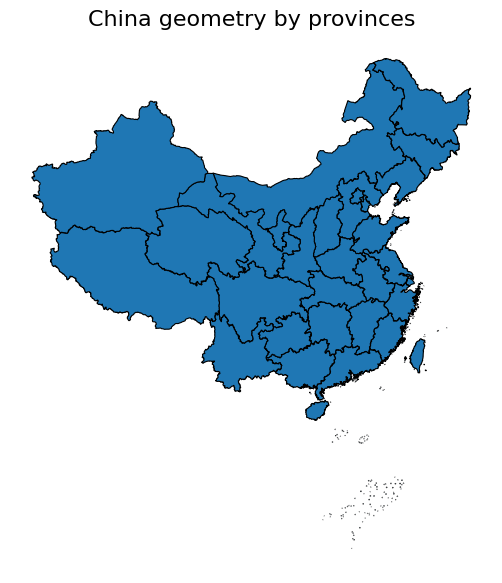

In [188]:
fig, ax = plt.subplots(1, figsize=(15, 7))
ax.axis('off')
map_df.plot(ax=ax,linewidth=0.8, edgecolor='0',legend=True,markersize=[39.739192, -104.990337])
ax.set_title("China geometry by provinces", fontdict={'fontsize': '16', 'fontweight' : '10'})
plt.show()

In [51]:
#prep column values to join
df_CHN["province"] = df_CHN["province"].str.lower()
df_CHN["province"] = df_CHN["province"].replace(["hong kong"],["hongkong"],regex=True)
df_CHN["province"] = df_CHN["province"].replace(["macau"],["macao"],regex=True)
map_df["NAME_PINGY"] = map_df["NAME_PINGY"].str.lower().replace(["neimenggu zizhiqu"],["inner mongolia"]) #map inner mongolia to non english province name
map_df["NAME_PINGY"] = map_df["NAME_PINGY"].str.lower().replace(["xizang zizhiqu"],["tibet"]) #map tibet to non english province name
map_df["NAME_PINGY"] = map_df["NAME_PINGY"].str.lower().replace([" shi| sheng| zizhiqu|zhuangzu|weiwu'erzu|huizu"],[""],regex=True)

In [197]:
df_CHN.head()

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long
index,,,,,,,,,,,,,,,,
111,2023-03-09,2275,7,0,0,0,0,2023-03-10 04:21:03,2268,0,0.0031,CHN,China,anhui,31.8257,117.2264
112,2023-03-09,40774,20,0,0,0,0,2023-03-10 04:21:03,40754,0,0.0005,CHN,China,beijing,40.1824,116.4142
113,2023-03-09,14715,11,0,0,0,0,2023-03-10 04:21:03,14704,0,0.0007,CHN,China,chongqing,30.0572,107.8740
114,2023-03-09,17122,2,0,0,0,0,2023-03-10 04:21:03,17120,0,0.0001,CHN,China,fujian,26.0789,117.9874
115,2023-03-09,1742,2,0,0,0,0,2023-03-10 04:21:03,1740,0,0.0011,CHN,China,gansu,36.0611,103.8343


In [53]:
map_df.sort_values("NAME_PINGY").head()

,GB,COUNT,SUM_AREA,SUM_PERIME,NAME_PINGY,NMAE_CHINE,X,Y,geometry
11,340000,82,1.401067e+11,1.665334e+07,anhui,°² »Õ,1.145903e+06,-2.613094e+05,"POLYGON ((1333766.875 -318727.281, 1334466.875..."
0,110000,15,1.663132e+10,2.374422e+06,beijing,±± ¾©,9.613544e+05,6.465288e+05,"POLYGON ((951820.688 567831.625, 949230.875 56..."
12,350000,119,1.215032e+11,1.679698e+07,fujian,¸£ ½¨,1.326014e+06,-9.237379e+05,"MULTIPOLYGON (((1307626.250 -1160653.750, 1308..."
26,620000,89,4.041209e+11,2.887701e+07,gansu,¸Ê Ëà,-2.186552e+05,3.149955e+05,"POLYGON ((156139.953 79137.117, 155842.281 801..."
18,440000,185,1.770322e+11,2.334886e+07,guangdong,¹ã ¶«,8.509019e+05,-1.322830e+06,"MULTIPOLYGON (((919051.500 -1382498.625, 91977..."


In [235]:
feature_of_interest = "fatality_rate"
df_join = map_df.set_index("NAME_PINGY").join(df_CHN.set_index("province"))
list_drop = df_join.columns.tolist()
list_drop.remove(feature_of_interest)
list_drop.remove("geometry")
df_join.drop(columns=list_drop,inplace=True)
# df_join[feature_of_interest] = df_join[feature_of_interest].replace(0,1)
df_join[feature_of_interest] = df_join[feature_of_interest].replace(0,df_join[feature_of_interest].mean())
df_join.dropna(inplace=True) # drop nan values because some provinces are not measured
df_join

,geometry,fatality_rate
NAME_PINGY,,
beijing,"POLYGON ((951820.688 567831.625, 949230.875 56...",0.000500
tianjin,"POLYGON ((1040181.938 652748.188, 1042009.688 ...",0.000700
hebei,"MULTIPOLYGON (((1158051.375 518894.063, 115706...",0.002100
shanxi,"POLYGON ((661683.188 617970.813, 661304.000 61...",0.000100
inner mongolia,"POLYGON ((1251883.000 2027025.625, 1252366.250...",0.000100
liaoning,"MULTIPOLYGON (((1377763.875 573652.750, 137837...",0.000600
jilin,"POLYGON ((1476061.875 1344268.500, 1476153.625...",0.000100
heilongjiang,"POLYGON ((1460460.875 1699750.750, 1460410.625...",0.002700
shanghai,"MULTIPOLYGON (((1586024.250 -277261.094, 15847...",0.008900


In [242]:
df_join_top = df_join.sort_values(feature_of_interest,ascending=False).head(4)
df_join_top

,geometry,fatality_rate
NAME_PINGY,,
hubei,"POLYGON ((461865.875 -377924.469, 460758.625 -...",0.0626
macao,"POLYGON ((893840.938 -1380211.500, 893545.000 ...",0.0344
shanghai,"MULTIPOLYGON (((1586024.250 -277261.094, 15847...",0.0089
hongkong,"MULTIPOLYGON (((930405.875 -1382925.000, 93105...",0.0047


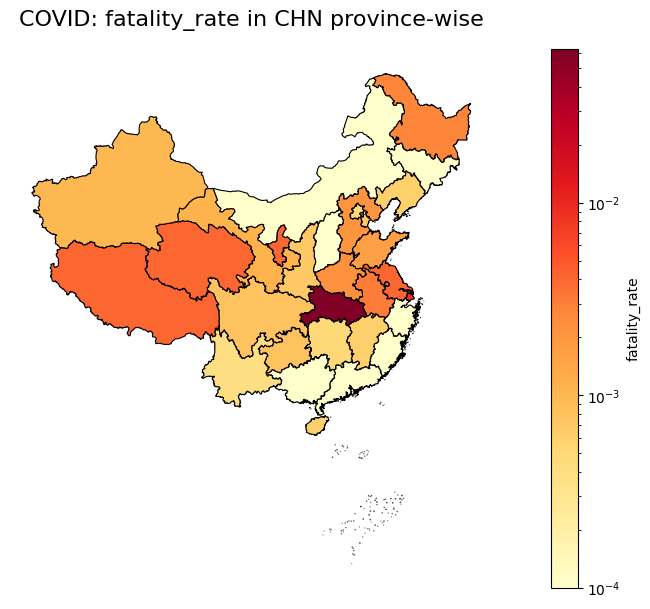

In [247]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# sns.set_style('whitegrid')
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(15, 7))
ax.axis('off')
ax.set_title('COVID: '+feature_of_interest+' in CHN province-wise', fontdict={'fontsize': '16', 'fontweight' : '10'})
# Plot the figure
df_join.plot(column=feature_of_interest,cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': feature_of_interest},norm=matplotlib.colors.LogNorm(vmin=df_join[feature_of_interest].min(), vmax=df_join[feature_of_interest].max()))
# df_join.plot(column=feature_of_interest,cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of "+feature_of_interest})
plt.show()

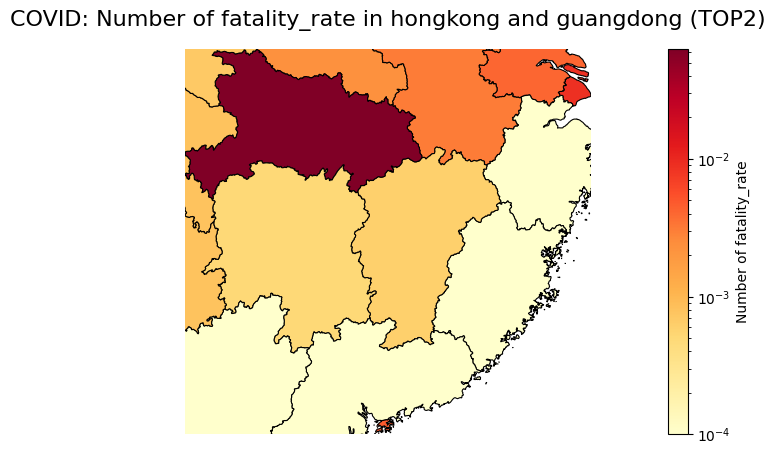

In [243]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.axis('off')
ax.set_title('COVID: Number of '+feature_of_interest+' in hongkong and guangdong (TOP2)', fontdict={'fontsize': '16', 'fontweight' : '10'})
# Set plot limit for better view (https://gis.stackexchange.com/questions/375582/zoom-to-a-plot-with-geopandas-based-on-data-from-csv-and-shapefile)
minx, miny, maxx, maxy = df_join_top.total_bounds 
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
# Plot the figure
df_join.plot(column=feature_of_interest,cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of "+feature_of_interest},norm=matplotlib.colors.LogNorm(vmin=df_join[feature_of_interest].min(), vmax=df_join[feature_of_interest].max()))
# df_join.plot(column=feature_of_interest,cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of "+feature_of_interest})
plt.show()

In [245]:
#Average population density in China in 2020, by province or region
#https://www.statista.com/statistics/1183370/china-population-density-by-region-province/
CHN_population_density = pd.read_excel(r"D:\git_repo_IO_mini_project1\IOD_mini_project1\statistic_id1183370_population-density-in-china-2020-by-region.xlsx",sheet_name="Data")
CHN_population_density.rename({"Unnamed: 0":"drop","Unnamed: 1":"name","Unnamed: 2":"inhabitants/km2"},axis="columns",inplace=True)
CHN_population_density.drop(columns="drop",inplace=True)
CHN_population_density.drop(index=CHN_population_density[CHN_population_density["inhabitants/km2"].isna()].index.tolist(),inplace=True)
CHN_population_density.reset_index(drop=True,inplace=True)
CHN_population_density.loc[len(CHN_population_density)] = ["Hongkong",6746.73] #add hongkong population density according to google
# CHN_population_density.loc[len(CHN_population_density)] = ["Taiwan",649] #add taiwan population density according to google
CHN_population_density.loc[len(CHN_population_density)] = ["Macao",23472] #add macao population density according to google
CHN_population_density["name"] = CHN_population_density["name"].str.lower().replace(["\*"],[""],regex=True)
df_join_pop_den = map_df.set_index("NAME_PINGY").join(CHN_population_density.set_index("name"))
df_join_pop_den = df_join_pop_den.sort_values("inhabitants/km2",ascending=False)
df_join_pop_den.describe()

,GB,COUNT,SUM_AREA,SUM_PERIME,X,Y,inhabitants/km2
count,33.000000,33.000000,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,32.000000
mean,420909.090909,90.151515,2.877227e+11,2.096472e+07,6.646085e+05,-1.921876e+05,1383.318125
std,198011.420699,51.370055,3.764037e+11,1.492734e+07,8.431714e+05,8.607207e+05,4240.076711
min,110000.000000,1.000000,1.542314e+07,1.789793e+04,-1.677291e+06,-1.736691e+06,3.030000
25%,310000.000000,52.000000,1.008392e+11,1.397334e+07,3.346157e+05,-8.997044e+05,125.675000
50%,420000.000000,89.000000,1.673810e+11,2.040993e+07,8.924305e+05,-2.565067e+05,291.950000
75%,540000.000000,119.000000,2.358571e+11,2.526441e+07,1.211254e+06,3.245150e+05,622.725000
max,820000.000000,199.000000,1.636396e+12,5.485877e+07,1.693961e+06,1.681706e+06,23472.000000


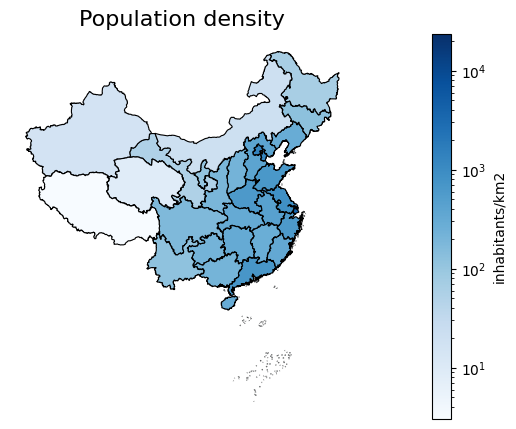

In [206]:
df_join_pop_den = df_join_pop_den[["geometry","inhabitants/km2"]]
# df_join_pop_den["inhabitants/km2"] = df_join_pop_den["inhabitants/km2"].replace(np.nan,1)
df_join_pop_den = df_join_pop_den.dropna()
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.axis('off')
# minx, miny, maxx, maxy = df_join_pop_den.head(2).total_bounds 
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)
ax.set_title('Population density', fontdict={'fontsize': '16', 'fontweight' : '10'})
df_join_pop_den.plot(column="inhabitants/km2",cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "inhabitants/km2"},norm=matplotlib.colors.LogNorm(vmin=df_join_pop_den["inhabitants/km2"].min(), vmax=df_join_pop_den["inhabitants/km2"].max()))
# df_join_pop_den.plot(column="inhabitants/km2",cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "inhabitants/km2"})
plt.show()

In [233]:
#List of Chinese administrative divisions by GDP
#https://en.wikipedia.org/wiki/List_of_Chinese_administrative_divisions_by_GDP#cite_note-data2022-1
CHN_gdp_province = pd.read_excel(r"D:\git_repo_IO_mini_project1\IOD_mini_project1\statistic_id1183370_population-density-in-china-2020-by-region.xlsx",sheet_name="Data_gdp")
CHN_gdp_province.rename({"Unnamed: 0":"drop","Unnamed: 1":"name","Unnamed: 2":"inhabitants/km2"},axis="columns",inplace=True)
CHN_gdp_province.drop(columns=["Rank"],inplace=True)
CHN_gdp_province
CHN_gdp_province.loc[len(CHN_gdp_province)] = ["Hongkong",2655.65] #add hongkong gdp according to google
CHN_gdp_province.loc[len(CHN_gdp_province)] = ["Macao",216] #add macao gdp according to google
CHN_gdp_province["Province"] = CHN_gdp_province["Province"].str.lower()
CHN_gdp_province
df_join_gdp_province = map_df.set_index("NAME_PINGY").join(CHN_gdp_province.set_index("Province"))
df_join_gdp_province = df_join_gdp_province.sort_values("GDP (CNY)",ascending=False)
df_join_gdp_province

,GB,COUNT,SUM_AREA,SUM_PERIME,NMAE_CHINE,X,Y,geometry,GDP (CNY)
NAME_PINGY,,,,,,,,,
guangdong,440000,185,1.770322e+11,2.334886e+07,¹ã ¶«,8.509019e+05,-1.322830e+06,"MULTIPOLYGON (((919051.500 -1382498.625, 91977...",12911.86
jiangsu,320000,90,1.008392e+11,1.397334e+07,½­ ËÕ,1.303640e+06,-1.201312e+05,"MULTIPOLYGON (((1339952.000 101856.266, 133917...",12287.56
shandong,370000,152,1.540515e+11,2.110645e+07,É½ ¶«,1.211254e+06,2.490674e+05,"MULTIPOLYGON (((1135189.500 412883.844, 113467...",8743.51
zhejiang,330000,163,1.019310e+11,1.538587e+07,Õã ½­,1.480108e+06,-5.352367e+05,"MULTIPOLYGON (((1615124.625 -415042.438, 16139...",7771.54
henan,410000,130,1.652419e+11,2.194960e+07,ºÓ ÄÏ,7.741621e+05,-8.225209e+04,"POLYGON ((792891.500 189651.266, 793652.688 19...",6134.51
sichuan,510000,199,5.665043e+11,5.409186e+07,ËÄ ´¨,-1.084229e+05,-5.341497e+05,"POLYGON ((46151.664 -234592.266, 45535.570 -23...",5674.98
hubei,420000,80,1.858175e+11,2.032411e+07,ºþ ±±,6.953781e+05,-4.143620e+05,"POLYGON ((461865.875 -377924.469, 460758.625 -...",5373.49
fujian,350000,119,1.215032e+11,1.679698e+07,¸£ ½¨,1.326014e+06,-9.237379e+05,"MULTIPOLYGON (((1307626.250 -1160653.750, 1308...",5310.99
hunan,430000,105,2.116264e+11,2.526441e+07,ºþ ÄÏ,6.498679e+05,-8.305474e+05,"POLYGON ((763696.375 -580820.563, 763812.813 -...",4867.04


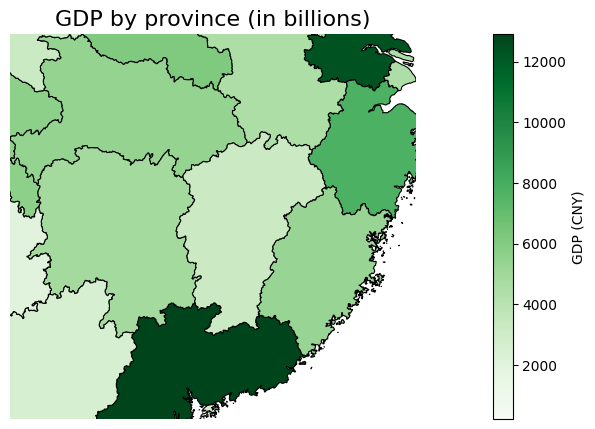

In [244]:
df_join_gdp_province = df_join_gdp_province[["geometry","GDP (CNY)"]]
# df_join_pop_den["inhabitants/km2"] = df_join_pop_den["inhabitants/km2"].replace(np.nan,1)
df_join_gdp_province = df_join_gdp_province.dropna()
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.axis('off')
# minx, miny, maxx, maxy = df_join_pop_den.head(2).total_bounds 
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_title('GDP by province (in billions)', fontdict={'fontsize': '16', 'fontweight' : '10'})
# df_join_gdp_province.plot(column="GDP (CNY)",cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "GDP (CNY)"},norm=matplotlib.colors.LogNorm(vmin=df_join_gdp_province["GDP (CNY)"].min(), vmax=df_join_gdp_province["GDP (CNY)"].max()))
df_join_gdp_province.plot(column="GDP (CNY)",cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "GDP (CNY)"})
plt.show()

In [110]:
# Exploring total confirmed, total deaths, fatality rate grouped by country name

df_groupby = df_merged_report.groupby("name").agg({"confirmed":"sum","deaths":"sum"}) # total confirmed cases and total deaths group by country name
df_groupby.reset_index(inplace=True) # reset index
df_groupby.rename(columns={"confirmed":"total_confirmed","deaths":"total_deaths"},inplace=True) # rename columns
df_groupby["fatality_rate"] = df_groupby["total_deaths"]/df_groupby["total_confirmed"]
df_groupby.head()

,name,total_confirmed,total_deaths,fatality_rate
0,Afghanistan,209451,7896,0.037699
1,Albania,334457,3598,0.010758
2,Algeria,271496,6881,0.025345
3,Andorra,47890,165,0.003445
4,Angola,105288,1933,0.018359


In [ ]:
profile = ProfileReport(df_groupby, title="Profiling Report")
profile.to_file("groupby_name_profiling_report.html")

In [114]:
N = 10
df_groupby = df_groupby.sort_values("fatality_rate",ascending=False) # sort by descending total confirmed cases
df_topN = df_groupby.head(N) # top N
df_topN

,name,total_confirmed,total_deaths,fatality_rate
105,MS Zaandam,9,2,0.222222
193,Yemen,11945,2159,0.180745
166,Sudan,63829,5017,0.078601
170,Syria,57467,3164,0.055058
161,Somalia,27324,1361,0.049810
138,Peru,4487553,219539,0.048922
53,Egypt,515759,24812,0.048108
115,Mexico,7483444,333188,0.044523
21,Bosnia and Herzegovina,401729,16280,0.040525
0,Afghanistan,209451,7896,0.037699


In [105]:
df_world_energy = pd.read_csv(r"D:\git_repo_IO_mini_project1\IOD_mini_project1\owid-energy-data.csv")
df_world_energy = df_world_energy[['country',
                                     'year',
                                     'iso_code',
                                     'population',
                                     'gdp',
                                     'biofuel_consumption',
                                     'electricity_demand',
                                     'primary_energy_consumption',]]
df_world_energy = df_world_energy[df_world_energy["year"]==df_world_energy["year"].max()]
df_world_energy

,country,year,iso_code,population,gdp,biofuel_consumption,electricity_demand,primary_energy_consumption
22,ASEAN (Ember),2022,NaN,NaN,NaN,NaN,1225.20,NaN
267,Africa,2022,NaN,1.426737e+09,NaN,1.122,NaN,5626.826
325,Africa (EI),2022,NaN,NaN,NaN,1.122,NaN,5626.826
348,Africa (Ember),2022,NaN,NaN,NaN,NaN,895.62,NaN
710,Algeria,2022,DZA,4.490323e+07,NaN,NaN,NaN,684.870
...,...,...,...,...,...,...,...,...
21318,Vietnam,2022,VNM,9.818686e+07,NaN,NaN,264.85,1274.762
21466,Western Africa (EI),2022,NaN,NaN,NaN,NaN,NaN,846.876
21631,World,2022,NaN,7.975105e+09,NaN,1199.207,28527.76,167787.672
21674,Yemen,2022,YEM,3.369661e+07,NaN,NaN,NaN,NaN


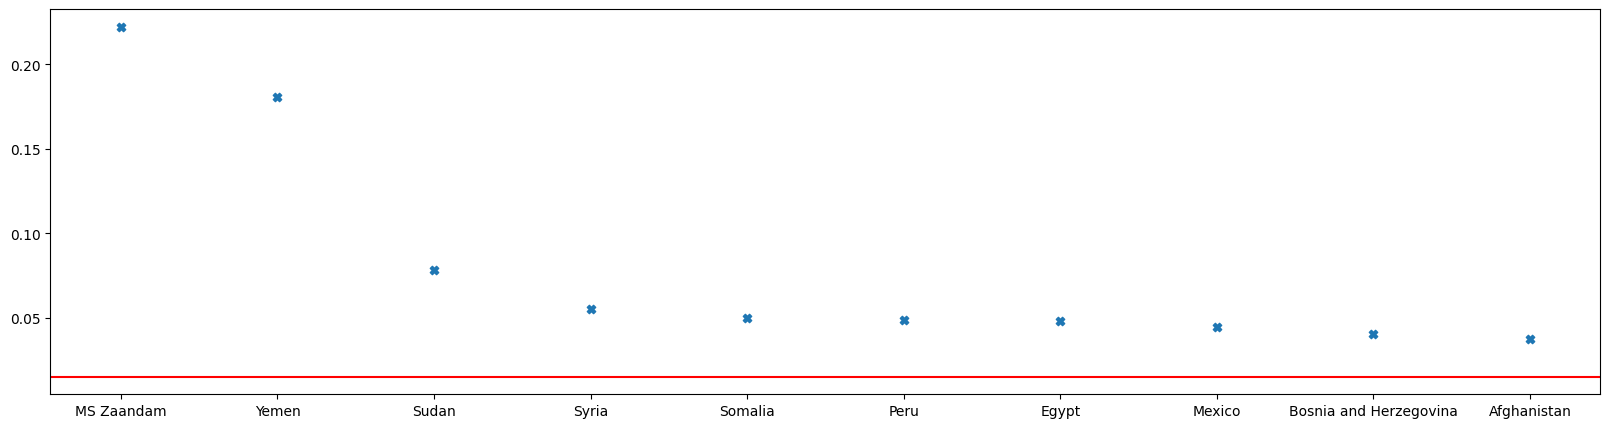

In [119]:
fig, ax = plt.subplots(1, figsize=(20, 5))
ax.scatter(df_topN["name"],df_topN["fatality_rate"],marker="X")
plt.axhline(y=df_groupby["fatality_rate"].mean(),color="red") # line plot of world mean fatality  rate
plt.show()